In [44]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

### CREATE AGG MATRIX AND READ DATA

In [45]:
data = pd.read_csv("data.csv", index_col=0) # 1 + 1*4 + 1*4*7 + 1*4*7*2
agg_mat_df = pd.read_csv("agg_mat.csv", index_col=0) # matrix of aggregated data with bottom time series

In [46]:
data.head()

,total,hol,vfr,bus,oth,nsw-hol,vic-hol,qld-hol,sa-hol,wa-hol,...,qld-oth-city,qld-oth-noncity,sa-oth-city,sa-oth-noncity,wa-oth-city,wa-oth-noncity,tas-oth-city,tas-oth-noncity,nt-oth-city,nt-oth-noncity
1998-03-31,84503,45906,26042,9815,2740,17589,10412,9078,3089,3449,...,431,271,244,73,168,37,76,24,35,8
1998-06-30,65312,29347,20676,11823,3466,11027,6025,6310,1935,2454,...,669,170,142,221,170,99,36,61,69,39
1998-09-30,72753,32492,20582,13565,6114,8910,5060,11733,1569,3398,...,270,1164,397,315,380,1166,32,23,150,338
1998-12-31,70880,31813,21613,11478,5976,10658,5481,8109,2270,3561,...,214,535,194,260,410,1139,48,43,172,453
1999-03-31,86893,46793,26947,10027,3126,16152,10958,10047,3023,4287,...,458,557,147,33,162,28,77,60,15,47


In [47]:
### create global matrix A
### create list of number of TS in each level
levels = [0, 1,1*4,1*4*7,1*4*7*2]
levels_left = [0, 1, 5, 5+28]
levels_right = [0, 4, 4+28, 4+28+56]
nb_ts_levels = [1, 4, 28, 56]
nb_ts_agg_levels = [1,4,7,2]

def matrix_per_level(global_Matrix, levels_left, levels_right, l):
    return np.array(global_Matrix.iloc[levels_left[l-1]:levels_left[l], levels_right[l-1]:levels_right[l]])

def creat_agg_mat(nb_ts_levels, nb_ts_agg_levels):
    nb_total_ts = sum(nb_ts_levels)
    nb_ts_agg =sum(nb_ts_levels[:len(nb_ts_levels)-1])
    global_Matrix = pd.DataFrame(np.zeros((nb_ts_agg, nb_total_ts-1)))
    
    
    for j in range(0,nb_ts_levels[1]):
        global_Matrix.iloc[0,j] = 1
    i=1
    for k in range(nb_ts_levels[1]):
        for j in range(4+k*7,4+(k+1)*7):
            global_Matrix.iloc[i,j] = 1
            #print(i,j)
        i+=1
    for k in range(nb_ts_levels[2]):
        for j in range(4+28+k*2,4+28+(k+1)*2):
            global_Matrix.iloc[i,j] = 1
            #print(i,j)
        i+=1
            

    return global_Matrix

In [48]:
A = creat_agg_mat(nb_ts_levels, nb_ts_agg_levels)
A

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
matrix_per_level(A, levels_left, levels_right, 2)

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.]])

### MODEL

In [78]:
# Split the data
### pivot data such as index is the name of columns
#data = data.pivot(index='date', columns='symbol', values='close')
pivot_df = data.T

X_train = pivot_df.iloc[:,:20]
#X_val = data.iloc[nb_train:nb_train+nb_val,:]
X_test = pivot_df.iloc[:,15:35]

y_train = pivot_df.iloc[:,20]
#y_val = data.iloc[nb_train+nb_val,:]
y_test = pivot_df.iloc[:,35]

input_size = 20
pred_length = 1

In [18]:
def calculate_wmape(actual_values, forecasted_values):
    n = len(actual_values)
    num = np.sum(np.abs(actual_values - forecasted_values))
    den = np.sum(np.abs(actual_values))
    wmape = 100*num/den
    return wmape

##### First model without coherency

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

In [43]:
## fix seed
keras.utils.set_random_seed(42)

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Create a sequential model
inp1 = Input(shape=(input_size,))
h1_w1 = Dense(1000, activation='relu')(inp1)
h2_w1  = Dense(100, activation='relu')(h1_w1)
h3_w1 = Dense(89, activation='relu')(h2_w1)
out1 = Dense(pred_length, activation='linear')(h3_w1)

mdl1 = Model(inputs=inp1, outputs=out1)

mdl1.compile(loss="mse", optimizer='adam')

history1 = mdl1.fit(X_train, y_train, epochs=15, batch_size=15)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

In [41]:
y_predict = np.array(mdl1.predict(X_test))#.reshape(-1)
y_predict.shape

3/3 [==============================] - 0s 4ms/step


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


(89, 89)

In [32]:
y_train.shape

(89,)

In [36]:
y_predict.shape

(89, 89)

In [33]:
y_predict

array([[7.6688930e+04],
       [3.4830832e+04],
       [2.5077865e+04],
       [1.1000188e+04],
       [5.5829521e+03],
       [1.0745343e+04],
       [6.5426743e+03],
       [9.7024883e+03],
       [2.3513184e+03],
       [3.2617249e+03],
       [1.3413060e+03],
       [4.6108508e+02],
       [9.0683613e+03],
       [5.1953257e+03],
       [5.7560342e+03],
       [1.7920051e+03],
       [2.1092722e+03],
       [7.4062714e+02],
       [2.5374384e+02],
       [3.4437781e+03],
       [1.8604131e+03],
       [2.5880203e+03],
       [7.9746844e+02],
       [1.4997753e+03],
       [3.0296542e+02],
       [4.5600760e+02],
       [1.4500391e+03],
       [8.5417902e+02],
       [1.4495359e+03],
       [5.0073236e+02],
       [8.9291583e+02],
       [1.5656235e+02],
       [2.0777112e+02],
       [1.5196788e+03],
       [9.2252158e+03],
       [1.8206790e+03],
       [4.7040586e+03],
       [4.2920308e+03],
       [5.3498169e+03],
       [5.9819318e+02],
       [1.7454132e+03],
       [1.061402

In [42]:
mdl1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_26 (Dense)            (None, 1000)              21000     
                                                                 
 dense_27 (Dense)            (None, 100)               100100    
                                                                 
 dense_28 (Dense)            (None, 89)                8989      
                                                                 
Total params: 130,089
Trainable params: 130,089
Non-trainable params: 0
_________________________________________________________________


In [607]:
y_predict = np.array(mdl1.predict(X_test))#.reshape(-1)
calculate_wmape(y_test.to_numpy(), y_predict)

3/3 [==============================] - 0s 4ms/step


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12.490965902911798

#### MODEL FOR HIERARCHICAL TIME SERIES

In [519]:
lengths = [1, 4, 28, 56]
def reshape_weights(weight, lengths):
    start_idx = 0
    result = []
    for length in lengths:
        sub_array = weight[start_idx:start_idx + length]
        result.append(sub_array)
        start_idx += length

    result = np.array(result)
    return result

In [539]:
# Assuming you have X_train and y_train
# Assuming you have lengths, A, levels_left, and levels_right defined

## fix seed
keras.utils.set_random_seed(42)

# Enable eager execution
tf.config.run_functions_eagerly(True)

layer = 3

# Define your custom loss function
def custom_loss_with_regularization(reg_weight, weight_matrix, lengths, A, levels_left, levels_right):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.mean_squared_error(y_true, y_pred)  # MSE loss
        
        def loss_up(weight_matrix):
            weights_list = weight_matrix
            n, m = weights_list.shape
            regularization_loss = 0

            for i in range(n):
                w = reshape_weights(weights_list[i], lengths)
                for l in range(len(w) - 1):
                    mat_agg = matrix_per_level(A, levels_left, levels_right, l + 1)
                    mat_agg = tf.convert_to_tensor(mat_agg, dtype=tf.float32)  # Convert to TensorFlow tensor
                    w_l = w[l]
                    w_l2 = w[l + 1]
                    w_l_expanded = tf.expand_dims(w_l, axis=0)
                    w_l2_expanded = tf.expand_dims(w_l2, axis=-1)
                    regularization_loss += tf.reduce_sum(w_l - tf.transpose(tf.matmul(mat_agg, w_l2_expanded)))
            
            return regularization_loss
        
        custom_reg_loss = loss_up(weight_matrix)
        total_loss = mse_loss + reg_weight * custom_reg_loss 
        return total_loss
    
    return loss


# Create a sequential model
inp = Input(shape=(input_size,))
h1_w = Dense(1000, activation='relu')(inp)
h2_w  = Dense(100, activation='relu')(h1_w)
h3_w = Dense(89, activation='relu')(h2_w)
out = Dense(pred_length, activation='linear')(h3_w)


mdl = Model(inputs=inp, outputs=out)

# Compile the model with the custom loss function and an optimizer
custom_loss = custom_loss_with_regularization(0.01, mdl.layers[layer].kernel, lengths, A, levels_left, levels_right)

mdl.compile(loss=custom_loss, optimizer='adam')

history = mdl.fit(X_train, y_train, epochs=15, batch_size=15)

Epoch 1/15


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


6/6 [==============================] - 6s 941ms/step - loss: 76966400.0000
Epoch 2/15
6/6 [==============================] - 6s 973ms/step - loss: 12550475.0000
Epoch 3/15
6/6 [==============================] - 7s 1s/step - loss: 3786074.0000
Epoch 4/15
6/6 [==============================] - 7s 1s/step - loss: 1883173.3750
Epoch 5/15
6/6 [==============================] - 7s 1s/step - loss: 4363362.0000
Epoch 6/15
6/6 [==============================] - 6s 1s/step - loss: 2683107.0000
Epoch 7/15
6/6 [==============================] - 6s 1s/step - loss: 3543339.5000
Epoch 8/15
6/6 [==============================] - 7s 1s/step - loss: 3236564.2500
Epoch 9/15
6/6 [==============================] - 6s 1s/step - loss: 1813246.8750
Epoch 10/15
6/6 [==============================] - 6s 1s/step - loss: 1111455.1250
Epoch 11/15
6/6 [==============================] - 6s 1s/step - loss: 675547.6250
Epoch 12/15
6/6 [==============================] - 7s 1s/step - loss: 820635.3125
Epoch 13/15
6/6 [=

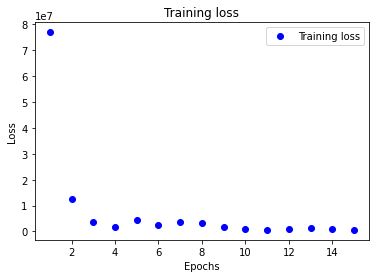

In [522]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [541]:
y_predict = np.array(mdl.predict(X_test))#.reshape(-1)
calculate_wmape(y_test.to_numpy(), y_predict)

3/3 [==============================] - 0s 9ms/step


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12.502670732220999

### MODEL + VALIDATION

In [265]:
# Assuming you have X_train and y_train
# Assuming you have lengths, A, levels_left, and levels_right defined

## fix seed
keras.utils.set_random_seed(42)

# Enable eager execution
tf.config.run_functions_eagerly(True)

layer = 3

# Define your custom loss function
def custom_loss_with_regularization(reg_weight, weight_matrix, lengths, A, levels_left, levels_right):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.mean_squared_error(y_true, y_pred)  # MSE loss
        
        def loss_up(weight_matrix):
            weights_list = weight_matrix
            n, m = weights_list.shape
            regularization_loss = 0

            for i in range(n):
                w = reshape_weights(weights_list[i], lengths)
                for l in range(len(w) - 1):
                    mat_agg = matrix_per_level(A, levels_left, levels_right, l + 1)
                    mat_agg = tf.convert_to_tensor(mat_agg, dtype=tf.float32)  # Convert to TensorFlow tensor
                    w_l = w[l]
                    w_l2 = w[l + 1]
                    w_l_expanded = tf.expand_dims(w_l, axis=0)
                    w_l2_expanded = tf.expand_dims(w_l2, axis=-1)
                    regularization_loss += tf.reduce_sum(w_l - tf.transpose(tf.matmul(mat_agg, w_l2_expanded)))
            
            return regularization_loss
        
        custom_reg_loss = loss_up(weight_matrix)
        total_loss = mse_loss + reg_weight * custom_reg_loss 
        return total_loss
    
    return loss

num_epochs_list = [5, 10, 15, 20]
batch_sizes_list = [4, 8, 12, 16]
reg_weights_list = [0.001, 0.01, 0.1]

# Create a sequential model
inp = Input(shape=(input_size,))
h1_w = Dense(1000, activation='relu')(inp)
h2_w  = Dense(100, activation='relu')(h1_w)
h3_w = Dense(89, activation='relu')(h2_w)
out = Dense(pred_length, activation='linear')(h3_w)

best_perf = 1000
best_epoch = 0
best_batch_size = 0
best_reg_weight = 0

for epoch in num_epochs_list:
    for batch_size in batch_sizes_list:
        for reg_weight in reg_weights_list:

            mdl = Model(inputs=inp, outputs=out)

            custom_loss = custom_loss_with_regularization(reg_weight, mdl.layers[layer].kernel, lengths, A, levels_left, levels_right)

            mdl.compile(loss=custom_loss, optimizer='adam')

            mdl.fit(X_train, y_train, epochs=epoch, batch_size=batch_size)

            y_predict = np.array(mdl.predict(X_train)).reshape(-1)
            perf = calculate_mape(y_train, y_predict)

            if perf < best_perf:
                best_perf = perf
                best_epoch = epoch
                best_batch_size = batch_size
                best_reg_weight = reg_weight

Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


23/23 [==============================] - 16s 676ms/step - loss: 23183096.0000
Epoch 2/5
23/23 [==============================] - 16s 691ms/step - loss: 2789020.5000
Epoch 3/5
23/23 [==============================] - 21s 933ms/step - loss: 37216008.0000
Epoch 4/5
23/23 [==============================] - 17s 696ms/step - loss: 1700548.3750
Epoch 5/5
3/3 [==============================] - 0s 0s/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 15s 658ms/step - loss: 6348883.5000
Epoch 2/5
23/23 [==============================] - 14s 631ms/step - loss: 273416.1250
Epoch 3/5
23/23 [==============================] - 14s 609ms/step - loss: 3454014.5000
Epoch 4/5
23/23 [==============================] - 13s 583ms/step - loss: 51335916.0000
Epoch 5/5
3/3 [==============================] - 0s 15ms/step


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


23/23 [==============================] - 29s 1s/step - loss: 4690937.0000
Epoch 2/5
23/23 [==============================] - 32s 1s/step - loss: 299930.5312
Epoch 3/5
23/23 [==============================] - 25s 1s/step - loss: 5061230.5000
Epoch 4/5
23/23 [==============================] - 17s 738ms/step - loss: 11910622.0000
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 8s 684ms/step - loss: 2050617.5000
Epoch 2/5
12/12 [==============================] - 8s 685ms/step - loss: 373017.8750
Epoch 3/5
12/12 [==============================] - 14s 1s/step - loss: 5213830.0000
Epoch 4/5
12/12 [==============================] - 14s 1s/step - loss: 3057460.5000
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 8s 660ms/step - loss: 2460251.2500
Epoch 2/5
12/12 [==============================] - 8s 630ms/step - loss: 1372250.0000
Epoch 3/5
12/12 [==============================] - 8s 677ms/step - loss: 4153233.2500
Epoch 4/5
12/12 [==============================] - 7s 625ms/step - loss: 2976549.5000
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 8s 668ms/step - loss: 2706510.7500
Epoch 2/5
12/12 [==============================] - 8s 658ms/step - loss: 4231844.5000
Epoch 3/5
12/12 [==============================] - 10s 793ms/step - loss: 890546.2500
Epoch 4/5
12/12 [==============================] - 8s 630ms/step - loss: 191114.3438
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 6s 742ms/step - loss: 361405.8750
Epoch 2/5
8/8 [==============================] - 5s 628ms/step - loss: 2465327.0000
Epoch 3/5
8/8 [==============================] - 5s 625ms/step - loss: 6995155.5000
Epoch 4/5
8/8 [==============================] - 5s 619ms/step - loss: 2732976.2500
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 654ms/step - loss: 1626132.8750
Epoch 2/5
8/8 [==============================] - 5s 647ms/step - loss: 4965535.0000
Epoch 3/5
8/8 [==============================] - 5s 677ms/step - loss: 2466865.5000
Epoch 4/5
8/8 [==============================] - 5s 673ms/step - loss: 442937.4688
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 617ms/step - loss: 1517263.8750
Epoch 2/5
8/8 [==============================] - 5s 622ms/step - loss: 395029.6250
Epoch 3/5
8/8 [==============================] - 5s 592ms/step - loss: 561663.7500
Epoch 4/5
8/8 [==============================] - 5s 599ms/step - loss: 344854.1250
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 662ms/step - loss: 178966.5781
Epoch 2/5
6/6 [==============================] - 4s 605ms/step - loss: 905540.1250
Epoch 3/5
6/6 [==============================] - 4s 717ms/step - loss: 6156253.5000
Epoch 4/5
6/6 [==============================] - 6s 930ms/step - loss: 2406833.0000
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 604ms/step - loss: 1323024.7500
Epoch 2/5
6/6 [==============================] - 4s 645ms/step - loss: 4700448.0000
Epoch 3/5
6/6 [==============================] - 4s 604ms/step - loss: 422871.5625
Epoch 4/5
6/6 [==============================] - 4s 611ms/step - loss: 320193.8125
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 5s 761ms/step - loss: 911672.2500
Epoch 2/5
6/6 [==============================] - 4s 618ms/step - loss: 761397.8125
Epoch 3/5
6/6 [==============================] - 4s 594ms/step - loss: 2335531.5000
Epoch 4/5
6/6 [==============================] - 4s 611ms/step - loss: 516316.1250
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 14s 591ms/step - loss: 2167636.7500
Epoch 2/10
23/23 [==============================] - 15s 651ms/step - loss: 290364.6875
Epoch 3/10
23/23 [==============================] - 14s 600ms/step - loss: 5370984.0000
Epoch 4/10
23/23 [==============================] - 14s 596ms/step - loss: 4233730.5000
Epoch 5/10
23/23 [==============================] - 14s 630ms/step - loss: 1013614.1875
Epoch 6/10
23/23 [==============================] - 14s 616ms/step - loss: 584229.1875
Epoch 7/10
23/23 [==============================] - 14s 616ms/step - loss: 283863.8125
Epoch 8/10
23/23 [==============================] - 14s 604ms/step - loss: 272350.2812
Epoch 9/10
23/23 [==============================] - 14s 610ms/step - loss: 413522.8750
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 16s 719ms/step - loss: 2345785.2500
Epoch 2/10
23/23 [==============================] - 20s 885ms/step - loss: 629349.1875
Epoch 3/10
23/23 [==============================] - 21s 937ms/step - loss: 6507387.0000
Epoch 4/10
23/23 [==============================] - 34s 1s/step - loss: 1531533.1250
Epoch 5/10
23/23 [==============================] - 33s 1s/step - loss: 442566.9688
Epoch 6/10
23/23 [==============================] - 34s 1s/step - loss: 556302.1250
Epoch 7/10
23/23 [==============================] - 33s 1s/step - loss: 382977.1562
Epoch 8/10
23/23 [==============================] - 33s 1s/step - loss: 477442.7500
Epoch 9/10
23/23 [==============================] - 15s 655ms/step - loss: 642184.1875
Epoch 10/10
3/3 [==============================] - 0s 9ms/step


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


23/23 [==============================] - 35s 2s/step - loss: 2329447.2500
Epoch 2/10
23/23 [==============================] - 34s 1s/step - loss: 397375.4062
Epoch 3/10
23/23 [==============================] - 17s 704ms/step - loss: 3499505.2500
Epoch 4/10
23/23 [==============================] - 20s 861ms/step - loss: 3138434.5000
Epoch 5/10
23/23 [==============================] - 34s 1s/step - loss: 483195.9062
Epoch 6/10
23/23 [==============================] - 33s 1s/step - loss: 2067058.7500
Epoch 7/10
23/23 [==============================] - 32s 1s/step - loss: 1632363.5000
Epoch 8/10
23/23 [==============================] - 33s 1s/step - loss: 3130218.5000
Epoch 9/10
23/23 [==============================] - 32s 1s/step - loss: 2691210.7500
Epoch 10/10
3/3 [==============================] - 0s 7ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 18s 1s/step - loss: 1157385.5000
Epoch 2/10
12/12 [==============================] - 18s 1s/step - loss: 938026.6250
Epoch 3/10
12/12 [==============================] - 18s 2s/step - loss: 3084999.2500
Epoch 4/10
12/12 [==============================] - 17s 1s/step - loss: 2631407.2500
Epoch 5/10
12/12 [==============================] - 8s 645ms/step - loss: 768256.0000
Epoch 6/10
12/12 [==============================] - 10s 819ms/step - loss: 184471.4531
Epoch 7/10
12/12 [==============================] - 19s 2s/step - loss: 150575.9219
Epoch 8/10
12/12 [==============================] - 19s 2s/step - loss: 228835.6875
Epoch 9/10
12/12 [==============================] - 20s 2s/step - loss: 215454.8125
Epoch 10/10
3/3 [==============================] - 0s 8ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 18s 2s/step - loss: 216163.5000
Epoch 2/10
12/12 [==============================] - 18s 2s/step - loss: 717025.1875
Epoch 3/10
12/12 [==============================] - 18s 1s/step - loss: 1918425.7500
Epoch 4/10
12/12 [==============================] - 18s 1s/step - loss: 2006835.7500
Epoch 5/10
12/12 [==============================] - 18s 2s/step - loss: 1655934.5000
Epoch 6/10
12/12 [==============================] - 18s 1s/step - loss: 542082.5000
Epoch 7/10
12/12 [==============================] - 18s 1s/step - loss: 2297590.7500
Epoch 8/10
12/12 [==============================] - 18s 1s/step - loss: 5357802.0000
Epoch 9/10
12/12 [==============================] - 18s 2s/step - loss: 7400522.0000
Epoch 10/10
3/3 [==============================] - 0s 0s/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 20s 2s/step - loss: 825570.4375
Epoch 2/10
12/12 [==============================] - 19s 2s/step - loss: 495900.2188
Epoch 3/10
12/12 [==============================] - 18s 2s/step - loss: 2378371.2500
Epoch 4/10
12/12 [==============================] - 19s 2s/step - loss: 1234549.8750
Epoch 5/10
12/12 [==============================] - 19s 2s/step - loss: 342855.0938
Epoch 6/10
12/12 [==============================] - 18s 2s/step - loss: 158690.0938
Epoch 7/10
12/12 [==============================] - 18s 2s/step - loss: 156990.1719
Epoch 8/10
12/12 [==============================] - 14s 1s/step - loss: 186011.6875
Epoch 9/10
12/12 [==============================] - 8s 648ms/step - loss: 229320.9375
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 6s 695ms/step - loss: 800039.5625
Epoch 2/10
8/8 [==============================] - 6s 702ms/step - loss: 325428.4375
Epoch 3/10
8/8 [==============================] - 5s 687ms/step - loss: 504303.7188
Epoch 4/10
8/8 [==============================] - 5s 646ms/step - loss: 300329.3125
Epoch 5/10
8/8 [==============================] - 5s 636ms/step - loss: 164754.3438
Epoch 6/10
8/8 [==============================] - 5s 606ms/step - loss: 142344.5156
Epoch 7/10
8/8 [==============================] - 5s 598ms/step - loss: 115046.2578
Epoch 8/10
8/8 [==============================] - 5s 586ms/step - loss: 284722.3750
Epoch 9/10
8/8 [==============================] - 5s 590ms/step - loss: 457985.4062
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 662ms/step - loss: 512187.5000
Epoch 2/10
8/8 [==============================] - 5s 648ms/step - loss: 1468551.1250
Epoch 3/10
8/8 [==============================] - 6s 756ms/step - loss: 2746351.7500
Epoch 4/10
8/8 [==============================] - 5s 655ms/step - loss: 374583.7500
Epoch 5/10
8/8 [==============================] - 5s 617ms/step - loss: 3107134.2500
Epoch 6/10
8/8 [==============================] - 5s 618ms/step - loss: 1259251.6250
Epoch 7/10
8/8 [==============================] - 5s 602ms/step - loss: 6866300.5000
Epoch 8/10
8/8 [==============================] - 5s 648ms/step - loss: 960787.3125
Epoch 9/10
8/8 [==============================] - 5s 632ms/step - loss: 1912173.0000
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 677ms/step - loss: 293033.4688
Epoch 2/10
8/8 [==============================] - 5s 650ms/step - loss: 571961.8750
Epoch 3/10
8/8 [==============================] - 5s 625ms/step - loss: 2440716.2500
Epoch 4/10
8/8 [==============================] - 5s 644ms/step - loss: 964039.1250
Epoch 5/10
8/8 [==============================] - 6s 716ms/step - loss: 1388227.7500
Epoch 6/10
8/8 [==============================] - 5s 647ms/step - loss: 205616.7656
Epoch 7/10
8/8 [==============================] - 5s 654ms/step - loss: 2835554.2500
Epoch 8/10
8/8 [==============================] - 5s 626ms/step - loss: 678580.1250
Epoch 9/10
8/8 [==============================] - 5s 663ms/step - loss: 331319.5000
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 612ms/step - loss: 423581.0000
Epoch 2/10
6/6 [==============================] - 4s 602ms/step - loss: 269003.0312
Epoch 3/10
6/6 [==============================] - 4s 594ms/step - loss: 1436310.6250
Epoch 4/10
6/6 [==============================] - 3s 581ms/step - loss: 840355.3125
Epoch 5/10
6/6 [==============================] - 4s 640ms/step - loss: 1787740.2500
Epoch 6/10
6/6 [==============================] - 4s 592ms/step - loss: 280851.4688
Epoch 7/10
6/6 [==============================] - 5s 931ms/step - loss: 4453004.0000
Epoch 8/10
6/6 [==============================] - 5s 817ms/step - loss: 737862.5000
Epoch 9/10
6/6 [==============================] - 4s 655ms/step - loss: 1445966.2500
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 624ms/step - loss: 422341.1250
Epoch 2/10
6/6 [==============================] - 4s 677ms/step - loss: 778027.3125
Epoch 3/10
6/6 [==============================] - 4s 607ms/step - loss: 1372877.0000
Epoch 4/10
6/6 [==============================] - 4s 603ms/step - loss: 350196.3750
Epoch 5/10
6/6 [==============================] - 4s 617ms/step - loss: 2400182.2500
Epoch 6/10
6/6 [==============================] - 4s 621ms/step - loss: 1116154.3750
Epoch 7/10
6/6 [==============================] - 4s 645ms/step - loss: 3679759.0000
Epoch 8/10
6/6 [==============================] - 4s 616ms/step - loss: 481152.1250
Epoch 9/10
6/6 [==============================] - 4s 674ms/step - loss: 1174423.2500
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 605ms/step - loss: 437598.7500
Epoch 2/10
6/6 [==============================] - 4s 604ms/step - loss: 607597.8125
Epoch 3/10
6/6 [==============================] - 4s 610ms/step - loss: 2145912.5000
Epoch 4/10
6/6 [==============================] - 4s 603ms/step - loss: 961161.0625
Epoch 5/10
6/6 [==============================] - 4s 634ms/step - loss: 2230789.5000
Epoch 6/10
6/6 [==============================] - 4s 628ms/step - loss: 835132.5000
Epoch 7/10
6/6 [==============================] - 4s 652ms/step - loss: 3172651.5000
Epoch 8/10
6/6 [==============================] - 4s 627ms/step - loss: 1240595.6250
Epoch 9/10
6/6 [==============================] - 4s 656ms/step - loss: 298003.7188
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/15


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 14s 611ms/step - loss: 1936996.6250
Epoch 2/15
23/23 [==============================] - 15s 642ms/step - loss: 224015.6250
Epoch 3/15
23/23 [==============================] - 14s 626ms/step - loss: 458359.1875
Epoch 4/15
23/23 [==============================] - 14s 597ms/step - loss: 2323578.7500
Epoch 5/15
23/23 [==============================] - 14s 601ms/step - loss: 622315.7500
Epoch 6/15
23/23 [==============================] - 13s 586ms/step - loss: 112972.2266
Epoch 7/15
23/23 [==============================] - 13s 586ms/step - loss: 138248.9375
Epoch 8/15
23/23 [==============================] - 14s 599ms/step - loss: 171514.5625
Epoch 9/15
23/23 [==============================] - 14s 592ms/step - loss: 412957.8750
Epoch 10/15
23/23 [==============================] - 14s 590ms/step - loss: 980426.4375
Epoch 11/15
23/23 [==============================] - 14s 601ms/step - loss: 1384378.0000
Epoch 12/15
23/23 [==============================

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 14s 617ms/step - loss: 1406159.7500
Epoch 2/15
23/23 [==============================] - 14s 625ms/step - loss: 1358787.5000
Epoch 3/15
23/23 [==============================] - 14s 614ms/step - loss: 4413586.5000
Epoch 4/15
23/23 [==============================] - 14s 607ms/step - loss: 1990803.3750
Epoch 5/15
23/23 [==============================] - 14s 593ms/step - loss: 570351.6250
Epoch 6/15
23/23 [==============================] - 14s 602ms/step - loss: 292636.5312
Epoch 7/15
23/23 [==============================] - 14s 605ms/step - loss: 153109.1875
Epoch 8/15
23/23 [==============================] - 14s 611ms/step - loss: 167840.5781
Epoch 9/15
23/23 [==============================] - 14s 605ms/step - loss: 214772.9844
Epoch 10/15
23/23 [==============================] - 14s 600ms/step - loss: 269312.7500
Epoch 11/15
23/23 [==============================] - 14s 606ms/step - loss: 164049.0156
Epoch 12/15
23/23 [=============================

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 13s 579ms/step - loss: 335878.7188
Epoch 2/15
23/23 [==============================] - 14s 605ms/step - loss: 756134.1250
Epoch 3/15
23/23 [==============================] - 14s 621ms/step - loss: 4065336.5000
Epoch 4/15
23/23 [==============================] - 14s 603ms/step - loss: 798217.5000
Epoch 5/15
23/23 [==============================] - 14s 604ms/step - loss: 211995.8906
Epoch 6/15
23/23 [==============================] - 14s 602ms/step - loss: 325465.2500
Epoch 7/15
23/23 [==============================] - 14s 596ms/step - loss: 204674.3750
Epoch 8/15
23/23 [==============================] - 14s 606ms/step - loss: 154764.6094
Epoch 9/15
23/23 [==============================] - 14s 599ms/step - loss: 354118.3750
Epoch 10/15
23/23 [==============================] - 14s 606ms/step - loss: 855798.1250
Epoch 11/15
23/23 [==============================] - 14s 608ms/step - loss: 433879.0938
Epoch 12/15
23/23 [==============================] 

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 7s 597ms/step - loss: 5381109.5000
Epoch 2/15
12/12 [==============================] - 8s 636ms/step - loss: 2814739.7500
Epoch 3/15
12/12 [==============================] - 7s 596ms/step - loss: 157174.3594
Epoch 4/15
12/12 [==============================] - 7s 590ms/step - loss: 152412.8594
Epoch 5/15
12/12 [==============================] - 7s 587ms/step - loss: 136831.0156
Epoch 6/15
12/12 [==============================] - 7s 588ms/step - loss: 92285.8906
Epoch 7/15
12/12 [==============================] - 7s 614ms/step - loss: 112643.8125
Epoch 8/15
12/12 [==============================] - 7s 586ms/step - loss: 91017.8203
Epoch 9/15
12/12 [==============================] - 7s 587ms/step - loss: 124254.0703
Epoch 10/15
12/12 [==============================] - 7s 588ms/step - loss: 127012.6875
Epoch 11/15
12/12 [==============================] - 7s 589ms/step - loss: 121441.6328
Epoch 12/15
12/12 [==============================] - 7s 613ms/s

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 7s 594ms/step - loss: 310010.7500
Epoch 2/15
12/12 [==============================] - 7s 617ms/step - loss: 703133.8125
Epoch 3/15
12/12 [==============================] - 7s 598ms/step - loss: 3128693.5000
Epoch 4/15
12/12 [==============================] - 7s 596ms/step - loss: 1098520.1250
Epoch 5/15
12/12 [==============================] - 7s 591ms/step - loss: 856253.3125
Epoch 6/15
12/12 [==============================] - 8s 666ms/step - loss: 147921.4531
Epoch 7/15
12/12 [==============================] - 9s 755ms/step - loss: 140506.1875
Epoch 8/15
12/12 [==============================] - 8s 694ms/step - loss: 404514.5938
Epoch 9/15
12/12 [==============================] - 8s 678ms/step - loss: 364050.3750
Epoch 10/15
12/12 [==============================] - 8s 623ms/step - loss: 664341.6875
Epoch 11/15
12/12 [==============================] - 7s 612ms/step - loss: 1109164.5000
Epoch 12/15
12/12 [==============================] - 8s 685m

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 7s 594ms/step - loss: 516925.2500
Epoch 2/15
12/12 [==============================] - 7s 626ms/step - loss: 82869.4062
Epoch 3/15
12/12 [==============================] - 7s 605ms/step - loss: 655325.8125
Epoch 4/15
12/12 [==============================] - 7s 608ms/step - loss: 257840.0469
Epoch 5/15
12/12 [==============================] - 7s 627ms/step - loss: 236520.2656
Epoch 6/15
12/12 [==============================] - 7s 624ms/step - loss: 199253.8125
Epoch 7/15
12/12 [==============================] - 8s 645ms/step - loss: 162551.4375
Epoch 8/15
12/12 [==============================] - 7s 613ms/step - loss: 237218.5625
Epoch 9/15
12/12 [==============================] - 8s 630ms/step - loss: 953845.5625
Epoch 10/15
12/12 [==============================] - 8s 641ms/step - loss: 2822487.2500
Epoch 11/15
12/12 [==============================] - 7s 590ms/step - loss: 5742902.5000
Epoch 12/15
12/12 [==============================] - 7s 616ms/

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 625ms/step - loss: 468366.9688
Epoch 2/15
8/8 [==============================] - 5s 624ms/step - loss: 359731.8125
Epoch 3/15
8/8 [==============================] - 5s 611ms/step - loss: 666681.4375
Epoch 4/15
8/8 [==============================] - 5s 607ms/step - loss: 195620.4219
Epoch 5/15
8/8 [==============================] - 5s 638ms/step - loss: 285085.4062
Epoch 6/15
8/8 [==============================] - 5s 626ms/step - loss: 161942.7031
Epoch 7/15
8/8 [==============================] - 5s 623ms/step - loss: 547704.0625
Epoch 8/15
8/8 [==============================] - 6s 702ms/step - loss: 1321669.8750
Epoch 9/15
8/8 [==============================] - 6s 721ms/step - loss: 125326.7969
Epoch 10/15
8/8 [==============================] - 6s 719ms/step - loss: 253675.9844
Epoch 11/15
8/8 [==============================] - 5s 638ms/step - loss: 287533.0938
Epoch 12/15
8/8 [==============================] - 5s 602ms/step - loss: 120871.9688

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 602ms/step - loss: 205140.8750
Epoch 2/15
8/8 [==============================] - 5s 667ms/step - loss: 486208.0312
Epoch 3/15
8/8 [==============================] - 5s 633ms/step - loss: 2057697.1250
Epoch 4/15
8/8 [==============================] - 5s 669ms/step - loss: 680851.0000
Epoch 5/15
8/8 [==============================] - 5s 634ms/step - loss: 1657476.1250
Epoch 6/15
8/8 [==============================] - 5s 637ms/step - loss: 314134.5938
Epoch 7/15
8/8 [==============================] - 5s 559ms/step - loss: 3992538.5000
Epoch 8/15
8/8 [==============================] - 5s 660ms/step - loss: 229376.0938
Epoch 9/15
8/8 [==============================] - 5s 630ms/step - loss: 883226.6250
Epoch 10/15
8/8 [==============================] - 5s 623ms/step - loss: 159143.4375
Epoch 11/15
8/8 [==============================] - 5s 613ms/step - loss: 143773.4375
Epoch 12/15
8/8 [==============================] - 5s 652ms/step - loss: 115304.25

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 625ms/step - loss: 156365.0938
Epoch 2/15
8/8 [==============================] - 5s 623ms/step - loss: 874473.4375
Epoch 3/15
8/8 [==============================] - 5s 609ms/step - loss: 2748076.0000
Epoch 4/15
8/8 [==============================] - 5s 651ms/step - loss: 886175.1250
Epoch 5/15
8/8 [==============================] - 5s 622ms/step - loss: 2192083.0000
Epoch 6/15
8/8 [==============================] - 5s 630ms/step - loss: 702749.8125
Epoch 7/15
8/8 [==============================] - 5s 620ms/step - loss: 3695182.5000
Epoch 8/15
8/8 [==============================] - 5s 639ms/step - loss: 583553.0625
Epoch 9/15
8/8 [==============================] - 5s 631ms/step - loss: 486316.0312
Epoch 10/15
8/8 [==============================] - 5s 606ms/step - loss: 242595.9375
Epoch 11/15
8/8 [==============================] - 5s 608ms/step - loss: 136070.4531
Epoch 12/15
8/8 [==============================] - 5s 691ms/step - loss: 158198.01

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 602ms/step - loss: 269004.0312
Epoch 2/15
6/6 [==============================] - 4s 610ms/step - loss: 379050.2812
Epoch 3/15
6/6 [==============================] - 4s 591ms/step - loss: 935959.8125
Epoch 4/15
6/6 [==============================] - 4s 591ms/step - loss: 236229.2969
Epoch 5/15
6/6 [==============================] - 4s 592ms/step - loss: 1724190.5000
Epoch 6/15
6/6 [==============================] - 4s 595ms/step - loss: 702961.5000
Epoch 7/15
6/6 [==============================] - 4s 602ms/step - loss: 3201160.7500
Epoch 8/15
6/6 [==============================] - 4s 603ms/step - loss: 397435.1875
Epoch 9/15
6/6 [==============================] - 4s 591ms/step - loss: 894764.8750
Epoch 10/15
6/6 [==============================] - 4s 638ms/step - loss: 698020.5625
Epoch 11/15
6/6 [==============================] - 4s 602ms/step - loss: 89279.7891
Epoch 12/15
6/6 [==============================] - 4s 593ms/step - loss: 273198.3750

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 651ms/step - loss: 236215.7031
Epoch 2/15
6/6 [==============================] - 4s 597ms/step - loss: 98405.4297
Epoch 3/15
6/6 [==============================] - 4s 601ms/step - loss: 96072.0312
Epoch 4/15
6/6 [==============================] - 4s 600ms/step - loss: 81729.4531
Epoch 5/15
6/6 [==============================] - 4s 602ms/step - loss: 182696.9688
Epoch 6/15
6/6 [==============================] - 4s 588ms/step - loss: 120324.6953
Epoch 7/15
6/6 [==============================] - 4s 595ms/step - loss: 71193.6328
Epoch 8/15
6/6 [==============================] - 4s 591ms/step - loss: 102703.9453
Epoch 9/15
6/6 [==============================] - 4s 589ms/step - loss: 200009.1406
Epoch 10/15
6/6 [==============================] - 4s 589ms/step - loss: 754372.9375
Epoch 11/15
6/6 [==============================] - 4s 644ms/step - loss: 788966.1875
Epoch 12/15
6/6 [==============================] - 4s 602ms/step - loss: 126873.5938
Epoc

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 601ms/step - loss: 227258.2188
Epoch 2/15
6/6 [==============================] - 4s 595ms/step - loss: 87820.7812
Epoch 3/15
6/6 [==============================] - 5s 738ms/step - loss: 90028.3125
Epoch 4/15
6/6 [==============================] - 4s 700ms/step - loss: 87881.9766
Epoch 5/15
6/6 [==============================] - 4s 620ms/step - loss: 129863.6875
Epoch 6/15
6/6 [==============================] - 4s 602ms/step - loss: 96937.8281
Epoch 7/15
6/6 [==============================] - 4s 651ms/step - loss: 78471.2578
Epoch 8/15
6/6 [==============================] - 4s 587ms/step - loss: 129105.2266
Epoch 9/15
6/6 [==============================] - 4s 590ms/step - loss: 506104.1875
Epoch 10/15
6/6 [==============================] - 4s 590ms/step - loss: 1370141.2500
Epoch 11/15
6/6 [==============================] - 4s 588ms/step - loss: 791692.9375
Epoch 12/15
6/6 [==============================] - 4s 593ms/step - loss: 340255.4062
Epoc

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 14s 594ms/step - loss: 318324.1250
Epoch 2/20
23/23 [==============================] - 13s 585ms/step - loss: 433544.8125
Epoch 3/20
23/23 [==============================] - 13s 581ms/step - loss: 3409134.0000
Epoch 4/20
23/23 [==============================] - 14s 589ms/step - loss: 1567720.2500
Epoch 5/20
23/23 [==============================] - 14s 587ms/step - loss: 130757.0703
Epoch 6/20
23/23 [==============================] - 14s 600ms/step - loss: 207760.2031
Epoch 7/20
23/23 [==============================] - 14s 589ms/step - loss: 137285.5469
Epoch 8/20
23/23 [==============================] - 14s 595ms/step - loss: 138420.8906
Epoch 9/20
23/23 [==============================] - 14s 600ms/step - loss: 218654.8750
Epoch 10/20
23/23 [==============================] - 14s 593ms/step - loss: 158019.2656
Epoch 11/20
23/23 [==============================] - 14s 596ms/step - loss: 600615.7500
Epoch 12/20
23/23 [==============================]

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 14s 587ms/step - loss: 8827253.0000
Epoch 2/20
23/23 [==============================] - 14s 600ms/step - loss: 584555.8750
Epoch 3/20
23/23 [==============================] - 14s 591ms/step - loss: 373633.9688
Epoch 4/20
23/23 [==============================] - 13s 586ms/step - loss: 140994.8125
Epoch 5/20
23/23 [==============================] - 15s 673ms/step - loss: 81597.0703
Epoch 6/20
23/23 [==============================] - 14s 597ms/step - loss: 110745.1484
Epoch 7/20
23/23 [==============================] - 14s 611ms/step - loss: 107219.9922
Epoch 8/20
23/23 [==============================] - 14s 594ms/step - loss: 129457.6094
Epoch 9/20
23/23 [==============================] - 14s 602ms/step - loss: 230874.5156
Epoch 10/20
23/23 [==============================] - 14s 620ms/step - loss: 189700.3125
Epoch 11/20
23/23 [==============================] - 15s 651ms/step - loss: 162352.2188
Epoch 12/20
23/23 [==============================] -

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

23/23 [==============================] - 14s 615ms/step - loss: 872329.1875
Epoch 2/20
23/23 [==============================] - 14s 601ms/step - loss: 155191.8125
Epoch 3/20
23/23 [==============================] - 16s 710ms/step - loss: 1022792.8750
Epoch 4/20
23/23 [==============================] - 19s 755ms/step - loss: 2539563.5000
Epoch 5/20
23/23 [==============================] - 14s 617ms/step - loss: 544806.1250
Epoch 6/20
23/23 [==============================] - 14s 615ms/step - loss: 264463.5312
Epoch 7/20
23/23 [==============================] - 14s 605ms/step - loss: 146500.4062
Epoch 8/20
23/23 [==============================] - 14s 603ms/step - loss: 89158.2266
Epoch 9/20
23/23 [==============================] - 14s 610ms/step - loss: 110469.7422
Epoch 10/20
23/23 [==============================] - 14s 605ms/step - loss: 296179.7188
Epoch 11/20
23/23 [==============================] - 14s 600ms/step - loss: 70019.6953
Epoch 12/20
23/23 [==============================] -

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 8s 627ms/step - loss: 3159974.0000
Epoch 2/20
12/12 [==============================] - 7s 606ms/step - loss: 3329269.2500
Epoch 3/20
12/12 [==============================] - 8s 625ms/step - loss: 125689.3047
Epoch 4/20
12/12 [==============================] - 8s 627ms/step - loss: 139120.1250
Epoch 5/20
12/12 [==============================] - 8s 653ms/step - loss: 128820.5938
Epoch 6/20
12/12 [==============================] - 8s 679ms/step - loss: 84699.9297
Epoch 7/20
12/12 [==============================] - 8s 668ms/step - loss: 115042.2578
Epoch 8/20
12/12 [==============================] - 8s 684ms/step - loss: 218536.0000
Epoch 9/20
12/12 [==============================] - 8s 659ms/step - loss: 124839.6328
Epoch 10/20
12/12 [==============================] - 8s 640ms/step - loss: 111985.7891
Epoch 11/20
12/12 [==============================] - 7s 621ms/step - loss: 119699.0312
Epoch 12/20
12/12 [==============================] - 8s 637ms/

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 7s 606ms/step - loss: 935285.5625
Epoch 2/20
12/12 [==============================] - 7s 606ms/step - loss: 1555146.1250
Epoch 3/20
12/12 [==============================] - 7s 600ms/step - loss: 2493610.5000
Epoch 4/20
12/12 [==============================] - 7s 607ms/step - loss: 522953.8125
Epoch 5/20
12/12 [==============================] - 8s 632ms/step - loss: 1038803.0625
Epoch 6/20
12/12 [==============================] - 7s 602ms/step - loss: 215387.3906
Epoch 7/20
12/12 [==============================] - 7s 601ms/step - loss: 812335.2500
Epoch 8/20
12/12 [==============================] - 7s 612ms/step - loss: 1402540.7500
Epoch 9/20
12/12 [==============================] - 7s 608ms/step - loss: 340752.2500
Epoch 10/20
12/12 [==============================] - 8s 625ms/step - loss: 147473.2188
Epoch 11/20
12/12 [==============================] - 7s 613ms/step - loss: 104773.4141
Epoch 12/20
12/12 [==============================] - 7s 614

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

12/12 [==============================] - 8s 644ms/step - loss: 675931.3750
Epoch 2/20
12/12 [==============================] - 8s 647ms/step - loss: 287773.8750
Epoch 3/20
12/12 [==============================] - 8s 668ms/step - loss: 641437.3125
Epoch 4/20
12/12 [==============================] - 7s 620ms/step - loss: 524104.8438
Epoch 5/20
12/12 [==============================] - 7s 609ms/step - loss: 180379.5781
Epoch 6/20
12/12 [==============================] - 8s 631ms/step - loss: 74611.3516
Epoch 7/20
12/12 [==============================] - 7s 614ms/step - loss: 73890.9688
Epoch 8/20
12/12 [==============================] - 7s 623ms/step - loss: 84945.3516
Epoch 9/20
12/12 [==============================] - 7s 610ms/step - loss: 232416.0625
Epoch 10/20
12/12 [==============================] - 7s 605ms/step - loss: 1062123.6250
Epoch 11/20
12/12 [==============================] - 8s 633ms/step - loss: 3685168.2500
Epoch 12/20
12/12 [==============================] - 7s 612ms/st

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 677ms/step - loss: 335327.5000
Epoch 2/20
8/8 [==============================] - 5s 611ms/step - loss: 180148.0938
Epoch 3/20
8/8 [==============================] - 5s 612ms/step - loss: 970020.9375
Epoch 4/20
8/8 [==============================] - 5s 608ms/step - loss: 373981.8125
Epoch 5/20
8/8 [==============================] - 5s 634ms/step - loss: 91176.0469
Epoch 6/20
8/8 [==============================] - 5s 676ms/step - loss: 85355.7969
Epoch 7/20
8/8 [==============================] - 5s 610ms/step - loss: 74379.8828
Epoch 8/20
8/8 [==============================] - 5s 632ms/step - loss: 134106.3594
Epoch 9/20
8/8 [==============================] - 5s 660ms/step - loss: 130509.6172
Epoch 10/20
8/8 [==============================] - 5s 614ms/step - loss: 179009.8281
Epoch 11/20
8/8 [==============================] - 5s 612ms/step - loss: 243749.3281
Epoch 12/20
8/8 [==============================] - 5s 624ms/step - loss: 247376.7812
Epo

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 673ms/step - loss: 368038.4375
Epoch 2/20
8/8 [==============================] - 5s 617ms/step - loss: 357990.5312
Epoch 3/20
8/8 [==============================] - 5s 616ms/step - loss: 1467662.6250
Epoch 4/20
8/8 [==============================] - 5s 642ms/step - loss: 292125.9375
Epoch 5/20
8/8 [==============================] - 5s 611ms/step - loss: 1056542.8750
Epoch 6/20
8/8 [==============================] - 5s 622ms/step - loss: 314575.4062
Epoch 7/20
8/8 [==============================] - 5s 613ms/step - loss: 3154256.2500
Epoch 8/20
8/8 [==============================] - 5s 610ms/step - loss: 986892.6875
Epoch 9/20
8/8 [==============================] - 5s 637ms/step - loss: 816803.6250
Epoch 10/20
8/8 [==============================] - 5s 618ms/step - loss: 248187.6406
Epoch 11/20
8/8 [==============================] - 5s 648ms/step - loss: 137894.4688
Epoch 12/20
8/8 [==============================] - 5s 601ms/step - loss: 96990.546

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

8/8 [==============================] - 5s 602ms/step - loss: 145376.2656
Epoch 2/20
8/8 [==============================] - 5s 602ms/step - loss: 629110.8125
Epoch 3/20
8/8 [==============================] - 5s 615ms/step - loss: 2472724.0000
Epoch 4/20
8/8 [==============================] - 5s 603ms/step - loss: 685881.6250
Epoch 5/20
8/8 [==============================] - 5s 614ms/step - loss: 2203230.2500
Epoch 6/20
8/8 [==============================] - 5s 596ms/step - loss: 601370.1875
Epoch 7/20
8/8 [==============================] - 5s 615ms/step - loss: 4148133.0000
Epoch 8/20
8/8 [==============================] - 5s 642ms/step - loss: 534204.6250
Epoch 9/20
8/8 [==============================] - 5s 625ms/step - loss: 636879.6250
Epoch 10/20
8/8 [==============================] - 5s 605ms/step - loss: 180811.3125
Epoch 11/20
8/8 [==============================] - 5s 609ms/step - loss: 116626.0938
Epoch 12/20
8/8 [==============================] - 5s 609ms/step - loss: 121245.07

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 601ms/step - loss: 209726.3125
Epoch 2/20
6/6 [==============================] - 4s 645ms/step - loss: 361377.4688
Epoch 3/20
6/6 [==============================] - 4s 680ms/step - loss: 1065119.2500
Epoch 4/20
6/6 [==============================] - 4s 670ms/step - loss: 285553.7188
Epoch 5/20
6/6 [==============================] - 4s 687ms/step - loss: 1888300.7500
Epoch 6/20
6/6 [==============================] - 4s 619ms/step - loss: 821737.3750
Epoch 7/20
6/6 [==============================] - 4s 603ms/step - loss: 2788118.0000
Epoch 8/20
6/6 [==============================] - 4s 597ms/step - loss: 422318.4688
Epoch 9/20
6/6 [==============================] - 4s 597ms/step - loss: 779974.5625
Epoch 10/20
6/6 [==============================] - 4s 603ms/step - loss: 511551.9688
Epoch 11/20
6/6 [==============================] - 4s 600ms/step - loss: 68147.0156
Epoch 12/20
6/6 [==============================] - 4s 618ms/step - loss: 203052.296

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 614ms/step - loss: 213118.0156
Epoch 2/20
6/6 [==============================] - 4s 642ms/step - loss: 451385.8125
Epoch 3/20
6/6 [==============================] - 4s 614ms/step - loss: 1086060.2500
Epoch 4/20
6/6 [==============================] - 4s 599ms/step - loss: 318677.0312
Epoch 5/20
6/6 [==============================] - 4s 608ms/step - loss: 1773895.2500
Epoch 6/20
6/6 [==============================] - 4s 597ms/step - loss: 824021.1250
Epoch 7/20
6/6 [==============================] - 4s 603ms/step - loss: 2325168.0000
Epoch 8/20
6/6 [==============================] - 4s 607ms/step - loss: 369390.8750
Epoch 9/20
6/6 [==============================] - 4s 593ms/step - loss: 710987.3125
Epoch 10/20
6/6 [==============================] - 4s 610ms/step - loss: 389133.9688
Epoch 11/20
6/6 [==============================] - 4s 608ms/step - loss: 61304.4258
Epoch 12/20
6/6 [==============================] - 4s 663ms/step - loss: 184343.671

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

6/6 [==============================] - 4s 611ms/step - loss: 205158.8281
Epoch 2/20
6/6 [==============================] - 4s 601ms/step - loss: 374363.6250
Epoch 3/20
6/6 [==============================] - 4s 651ms/step - loss: 1018457.1875
Epoch 4/20
6/6 [==============================] - 4s 610ms/step - loss: 277337.0000
Epoch 5/20
6/6 [==============================] - 4s 619ms/step - loss: 1798464.0000
Epoch 6/20
6/6 [==============================] - 4s 629ms/step - loss: 799069.3750
Epoch 7/20
6/6 [==============================] - 4s 602ms/step - loss: 2501891.5000
Epoch 8/20
6/6 [==============================] - 4s 601ms/step - loss: 361671.1562
Epoch 9/20
6/6 [==============================] - 4s 615ms/step - loss: 804121.0625
Epoch 10/20
6/6 [==============================] - 4s 602ms/step - loss: 375716.7188
Epoch 11/20
6/6 [==============================] - 4s 652ms/step - loss: 57067.9219
Epoch 12/20
6/6 [==============================] - 4s 619ms/step - loss: 181545.531

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [266]:
print(best_reg_weight, best_epoch, best_batch_size)

0.1 20 16


In [557]:
best_reg_weight = 0.1
best_epoch = 15
best_batch_size = 15

In [609]:
# Assuming you have X_train and y_train
# Assuming you have lengths, A, levels_left, and levels_right defined

## fix seed
keras.utils.set_random_seed(42)

# Enable eager execution
tf.config.run_functions_eagerly(True)

layer = 3

# Define your custom loss function
def custom_loss_with_regularization(reg_weight, weight_matrix, lengths, A, levels_left, levels_right):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.mean_squared_error(y_true, y_pred)  # MSE loss
        
        def loss_up(weight_matrix):
            weights_list = weight_matrix
            n, m = weights_list.shape
            regularization_loss = 0

            for i in range(n):
                w = reshape_weights(weights_list[i], lengths)
                for l in range(len(w) - 1):
                    mat_agg = matrix_per_level(A, levels_left, levels_right, l + 1)
                    mat_agg = tf.convert_to_tensor(mat_agg, dtype=tf.float32)  # Convert to TensorFlow tensor
                    w_l = w[l]
                    w_l2 = w[l + 1]
                    w_l_expanded = tf.expand_dims(w_l, axis=0)
                    w_l2_expanded = tf.expand_dims(w_l2, axis=-1)
                    regularization_loss += tf.reduce_sum(w_l - tf.transpose(tf.matmul(mat_agg, w_l2_expanded)))
            
            return regularization_loss
        
        custom_reg_loss = loss_up(weight_matrix)
        total_loss = mse_loss + reg_weight * custom_reg_loss 
        return total_loss
    
    return loss


# Create a sequential model
inp = Input(shape=(input_size,))
h1_w = Dense(1000, activation='relu')(inp)
h2_w  = Dense(100, activation='relu')(h1_w)
h3_w = Dense(89, activation='relu')(h2_w)
out = Dense(pred_length, activation='linear')(h3_w)


mdl = Model(inputs=inp, outputs=out)


# Compile the model with the custom loss function and an optimizer
custom_loss = custom_loss_with_regularization(best_reg_weight, mdl.layers[layer].kernel, lengths, A, levels_left, levels_right)

mdl.compile(loss=custom_loss, optimizer='adam')

history = mdl.fit(X_train, y_train, epochs=best_epoch, batch_size=best_batch_size)

Epoch 1/15


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


6/6 [==============================] - 7s 997ms/step - loss: 76966472.0000
Epoch 2/15
6/6 [==============================] - 8s 1s/step - loss: 12550232.0000
Epoch 3/15
6/6 [==============================] - 10s 1s/step - loss: 3786440.7500
Epoch 4/15
6/6 [==============================] - 5s 886ms/step - loss: 1882553.0000
Epoch 5/15
6/6 [==============================] - 5s 894ms/step - loss: 4396790.5000
Epoch 6/15
6/6 [==============================] - 5s 825ms/step - loss: 2706615.5000
Epoch 7/15
6/6 [==============================] - 6s 1s/step - loss: 3420189.0000
Epoch 8/15
6/6 [==============================] - 7s 1s/step - loss: 3262899.5000
Epoch 9/15
6/6 [==============================] - 5s 902ms/step - loss: 1664333.8750
Epoch 10/15
6/6 [==============================] - 5s 871ms/step - loss: 1165098.3750
Epoch 11/15
6/6 [==============================] - 5s 894ms/step - loss: 717611.7500
Epoch 12/15
6/6 [==============================] - 5s 863ms/step - loss: 876087.3750

In [613]:
y_predict = np.array(mdl.predict(X_test))#.reshape(-1)
calculate_wmape(y_test.to_numpy(), y_predict)

3/3 [==============================] - 0s 3ms/step


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12.139808665811255

#### METRIC WMAPE

In [614]:
total_ts = [0,1,5,5+28,5+28+56]
def wmape_level(actual_value, forecasted_value, total_ts, lengths):
    nb_levels = len(lengths)
    wmapes = []
    for l in range(nb_levels):
        actual_value_ts = actual_value[total_ts[l]:total_ts[l+1], :]
        forecasted_value_ts = forecasted_value[total_ts[l]:total_ts[l+1], :]
        wmapes.append(calculate_wmape(actual_value_ts, forecasted_value_ts))
    return wmapes

In [615]:
wmape_level(y_test.to_numpy(), y_predict, total_ts, lengths)

[5.233650390064986, 9.735235609953492, 15.545334171796341, 18.0450144914302]

In [568]:
wmape_level(y_test.to_numpy(), y_predict, total_ts, lengths)

[6.034735334829896, 9.690669768455404, 15.943665489501038, 18.294793018860855]

### METRIC RMSSE

In [583]:
### I have an array of shape (89,5)
### create dataframe with predictions
def create_df(y_predict, pred_length, data):
    ### dataframe with name of columns same as in data_for_model_000
    ### create a dataframe based on data, remove last pred_length rows, and add y_predict
    ### return dataframe
    y_predict_df = y_predict.astype(np.float32)
    y_predict_df = pd.DataFrame(y_predict_df)
    y_predict_df = y_predict_df.T
    df = data.copy()
    for i,col in enumerate(data.columns):
        df[col][-(pred_length):] = y_predict_df[:][i]
    return df

In [584]:
pred_length = 8
data_pred = create_df(y_predict, pred_length, data)

C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\3659190252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][-(pred_length):] = y_predict_df[:][i]


In [585]:
def rmsse_ts(pred_length, data, data_pred, ts):
    H = pred_length
    T = data.shape[0] - H
    ts_array = data.iloc[:,ts].values
    ts_array_pred = data_pred.iloc[:,ts].values
    e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
    e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2
    return np.sqrt(e/e_naive)

In [586]:
rmsse_ts(pred_length, data, data_pred, 0)

C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\1879541792.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\1879541792.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2


2.110934093610633

In [587]:
total_ts = [0,1,5,5+28,5+28+56]
def rmsse_level(pred_length, data, data_pred, total_ts, lengths):
    nb_levels = len(lengths)
    r_l = [0]*nb_levels
    for l in range(nb_levels):
        for j in range(total_ts[l], total_ts[l+1]):
            #print(l, j)
            r_l[l] += (1/lengths[l])*rmsse_ts(pred_length, data, data_pred, j)
    print(r_l)
    R = np.mean(r_l)
    return R

In [578]:
rmsse_level(pred_length, data, data_pred, total_ts, lengths)

[3.130729664416297, 5.731716317199648, 60.24285867661827, 22.308377102462828]


C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\1879541792.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\1879541792.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2


22.85342044017426

In [588]:
rmsse_level(pred_length, data, data_pred, total_ts, lengths)

[2.110934093610633, 4.619899574400161, 52.30545289894444, 21.31041125686769]


C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\1879541792.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum(ts_array[t] - ts_array_pred[t] for t in range(T, T+H))**2
C:\Users\hamza\AppData\Local\Temp\ipykernel_7836\1879541792.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum(ts_array[t] - ts_array[t-1] for t in range(1, T))**2


20.08667445595573